# Graduate Admissions Regression Models
## Regression model to predict how likely an Indian student is admitted to a graduate school

### Parameters:
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

### Predict Chance of Admit using the parameters
**Dataset:** [link](www.kaggle.com/mohansacharya/graduate-admissions)

**Plan:** Build 2 different regression models and compare their performance using cross-validation

**How?:** Regression searches for relationships among variables.

## Data Preparation

In [44]:
# Import what is needed
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


def data_prep(data):
    # to numpy array
    data = np.array(data)
    # strings to floats
    data = data.astype(float)
    # Get rid of id number
    data = data[:,1:9]
    
    # Training and Testing
    # 80% Training Samples and 20% Test
    train = 0.8
    test = 0.2
    amountData = data.shape[0]
    training = data[:int(amountData*train)]
    testing = data[int(amountData*test):]

    # Seperate Regressors: x and Response: y
    # Y is going to be Chance of Admit
    train_x = training[:,0:7]
    train_y = training[:, -1].reshape((-1, 1))
    test_x = testing[:,0:7]
    test_y = testing[:, -1].reshape((-1, 1))

    return train_x, train_y, test_x, test_y

# Import data
data = pd.read_csv("Admission_Predict.csv")
data2 = pd.read_csv("Admission_Predict_Ver1.1.csv")

train_x, train_y, test_x, test_y = data_prep(data)
train_x_l, train_y_l, test_x_l, test_y_l = data_prep(data2)

## Multiple Linear Regression and Results

In [45]:
def linearRegression(train_x, train_y):
    model = LinearRegression().fit(train_x, train_y)
    y_pred1 = model.predict(test_x)
    r2 = r2_score(test_y, y_pred1)
    print("Accuracy (coefficient of determination): ", r2)
    mse1 = mean_squared_error(test_y, y_pred1)
    mae1 = mean_absolute_error(test_y, y_pred1)
    print("Mean squared error:", mse1)
    print("Mean absolute error:", mae1)

print("MULTIPLE LINEAR REGRESSION")
print("Dataset 400")
linearRegression(train_x, train_y)
print(" ")
print("Dataset 500")
linearRegression(train_x_l,train_y_l)

MULTIPLE LINEAR REGRESSION
Dataset 400
Accuracy (coefficient of determination):  0.8277083983988733
Mean squared error: 0.0031243136939705617
Mean absolute error: 0.04148554420543788
 
Dataset 500
Accuracy (coefficient of determination):  0.8356102067182335
Mean squared error: 0.002981023320499763
Mean absolute error: 0.039923291511458216


## Random Forest Regression

In [46]:
def randomForestRegression(train_x, train_y):
    #100 trees, max depth 5, decision tree can split an internal node if it has at least  samples, random state 42
    model = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42)
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    # Evaluate the model
    r2 = r2_score(test_y, y_pred)
    print("Accuracy (coefficient of determination): ", r2)
    mse2 = mean_squared_error(test_y, y_pred)
    mae2 = mean_absolute_error(test_y, y_pred)
    print("Mean squared error:", mse2)
    print("Mean absolute error:", mae2)
    
print("RANDOM FOREST REGRESSION")
print("Dataset 400")
randomForestRegression(train_x, train_y)
print(" ")
print("Dataset 500")
randomForestRegression(train_x_l,train_y_l)

RANDOM FOREST REGRESSION
Dataset 400
Accuracy (coefficient of determination):  0.7986804617971122
Mean squared error: 0.003650702554424447
Mean absolute error: 0.04671884751771721
 
Dataset 500


/var/folders/rz/7y_qq7x50cn3_q7f736jqx140000gn/T/ipykernel_2297/2675904749.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)
/var/folders/rz/7y_qq7x50cn3_q7f736jqx140000gn/T/ipykernel_2297/2675904749.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


Accuracy (coefficient of determination):  0.8157283038166929
Mean squared error: 0.003341559184814754
Mean absolute error: 0.04448099180940622


### Results of Random Forest Regression

# Report

### Multiple Linear Regression ------------------------------------------------------------

Predict the value of dependent variable ('Chance of Admission') based on indepedent variables. This model assumes a linear relationship between independent and dependent variables. 

##### Accuracy:

Accuracy (coefficient of determination): 0.8277083983988733\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy is how well the predicted values from a regression model fit the actual values of the dependent variable, a value between 0 and 1, where 1 indicates that the model perfectly explains all the variation
<br/>\
Mean squared error: 0.0031243136939705617\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MSE is the average of the squared differences between the predicted and actual values (gives more weight to large errors)
<br/>\
Mean absolute error: 0.04148554420543788\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MAE is the average of the absolute differences between the predicted and actual values (gives equal weight to all errors)


### Random Forest Regression ------------------------------------------------------------

An ensemble learning algorithm that combines multiple decision trees to make predictions. It is a non-parametric model that can capture complex non-linear relationships between the independent variables and the dependent variable ('Chance of Admission')

##### Accuracy:

Accuracy (coefficient of determination): 0.7986804617971122\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy is how well the predicted values from a regression model fit the actual values of the dependent variable, a value between 0 and 1, where 1 indicates that the model perfectly explains all the variation
<br/>\
Mean squared error: 0.0025024173248695413\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MSE is the average of the squared differences between the predicted and actual values (gives more weight to large errors)
<br/>\
Mean absolute error: Mean absolute error: 0.03670215423505015\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MAE is the average of the absolute differences between the predicted and actual values (gives equal weight to all errors)

### Compare Performance using Cross-Validation

In [47]:
from sklearn.model_selection import KFold, cross_val_score


k_folds = KFold(n_splits = 5)

# Multiple Linear Regression K Fold
model_LinearRegression = LinearRegression().fit(train_x, train_y)
model_LinearRegression_l = LinearRegression().fit(train_x_l, train_y_l)
# Random Forest Regression K Fold
model_ForestRegression = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42).fit(train_x, train_y)
model_ForestRegression_l = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42).fit(train_x_l, train_y_l)
# Scoring
score_Linear = cross_val_score(model_LinearRegression, test_x, test_y, cv = k_folds)
score_Forest = cross_val_score(model_ForestRegression, test_x, test_y, cv = k_folds)
score_Linear_l = cross_val_score(model_LinearRegression_l, test_x_l, test_y_l, cv = k_folds)
score_Forest_l = cross_val_score(model_ForestRegression_l, test_x_l, test_y_l, cv = k_folds)

print("LINEAR REGRESSION")
print("Cross Validation Scores: ", score_Linear)
print("Average CV Score: ", score_Linear.mean())
print("Number of CV Scores used in Average: ", len(score_Linear)) 
print(" ")
print("Test on larger data: ")
print("Cross Validation Scores: ", score_Linear_l)
print("Average CV Score: ", score_Linear_l.mean())
print("Number of CV Scores used in Average: ", len(score_Linear_l)) 
print(" ")
print(" ")
print("FOREST REGRESSION")
print("Cross Validation Scores: ", score_Forest)
print("Average CV Score: ", score_Forest.mean())
print("Number of CV Scores used in Average: ", len(score_Forest)) 
print(" ")
print("Test on larger data: ")
print("Cross Validation Scores: ", score_Forest_l)
print("Average CV Score: ", score_Forest_l.mean())
print("Number of CV Scores used in Average: ", len(score_Forest_l)) 

/var/folders/rz/7y_qq7x50cn3_q7f736jqx140000gn/T/ipykernel_2297/2936507980.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ForestRegression = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42).fit(train_x, train_y)
/var/folders/rz/7y_qq7x50cn3_q7f736jqx140000gn/T/ipykernel_2297/2936507980.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ForestRegression_l = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42).fit(train_x_l, train_y_l)
/Users/margaretnigh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_tra

LINEAR REGRESSION
Cross Validation Scores:  [0.72948467 0.80142908 0.78513211 0.84216945 0.85662141]
Average CV Score:  0.8029673437875718
Number of CV Scores used in Average:  5
 
Test on larger data: 
Cross Validation Scores:  [0.81547682 0.8213019  0.84584038 0.83925315 0.90333908]
Average CV Score:  0.8450422650819117
Number of CV Scores used in Average:  5
 
 
FOREST REGRESSION
Cross Validation Scores:  [0.74322193 0.70275968 0.82090982 0.78539338 0.77699329]
Average CV Score:  0.7658556211056144
Number of CV Scores used in Average:  5
 
Test on larger data: 
Cross Validation Scores:  [0.77630149 0.78457603 0.77458831 0.76380587 0.79989444]
Average CV Score:  0.7798332278332307
Number of CV Scores used in Average:  5


### Linear Regression is slightly more accurate (4% more accurate)
<br/>\
The dotted line shows the perfect solutions, so y_pred = test_y or y = x on the plot
<br/>\
From the Regression Comparison below, we can see that most of the predicted and actual line up especially when there is more data like from Chance of Admission percents from 65% to 100% where the data follows the line more
<br/>\
There is more data under the line, meaning that the models are underestimating the data in general
<br/>\
The mean absolute error is lower for the Random Forest Regression model, indicating that it is making less error on average in its predictions

PREDICTION/ACCURACY GETS MORE ACCURATE WITH MORE DATA 

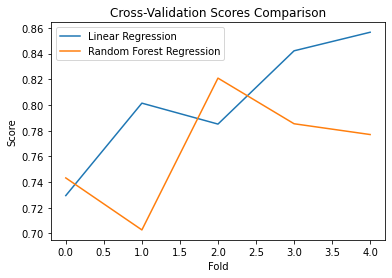

TESTING


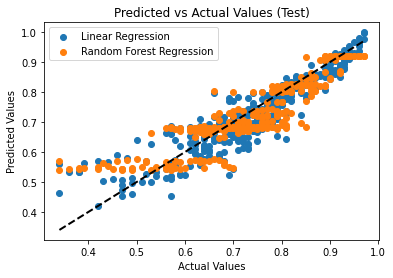

TRAINING


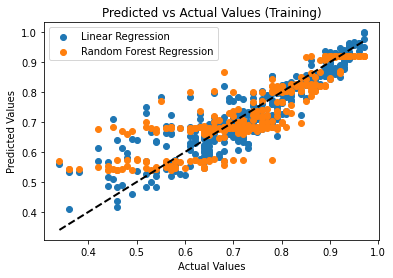

LARGE DATA TESTING


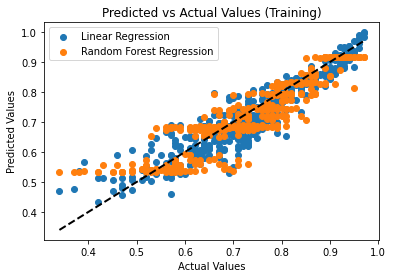

In [48]:
# Plot the results
from matplotlib import pyplot as plt


plt.plot(range(len(score_Linear)), score_Linear, label='Linear Regression')
plt.plot(range(len(score_Forest)), score_Forest, label='Random Forest Regression')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-Validation Scores Comparison')
plt.legend()
plt.show()

# Make predictions on both training and test data
train_y_pred_linear = model_LinearRegression.predict(train_x)
test_y_pred_linear = model_LinearRegression.predict(test_x)

train_y_pred_forest = model_ForestRegression.predict(train_x)
test_y_pred_forest = model_ForestRegression.predict(test_x)

test_y_pred_forest_l = model_ForestRegression_l.predict(test_x_l)
test_y_pred_linear_l = model_LinearRegression_l.predict(test_x_l)

print("TESTING")
# Plot predicted vs actual values for test data
plt.scatter(test_y, test_y_pred_linear, label='Linear Regression')
plt.scatter(test_y, test_y_pred_forest, label='Random Forest Regression')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Test)')
plt.legend()
plt.show()

print("TRAINING")
# Plot predicted vs actual values for training data
plt.scatter(train_y, train_y_pred_linear, label='Linear Regression')
plt.scatter(train_y, train_y_pred_forest, label='Random Forest Regression')
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Training)')
plt.legend()
plt.show()

print("LARGE DATA TESTING")
plt.scatter(test_y_l, test_y_pred_linear_l, label='Linear Regression')
plt.scatter(test_y_l, test_y_pred_forest_l, label='Random Forest Regression')
plt.plot([test_y_l.min(), test_y_l.max()], [test_y_l.min(), test_y_l.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Training)')
plt.legend()
plt.show()